In [9]:
import pandas as pd

import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(16, 8)})


random brian notes

 Roughly speaking, the theta frequency in the frontal cortex is positively correlated with increasing CWL, while conversely, the alpha frequency of the parietal cortex decreases as CWL increases (Gevins et al., 1997; Lei & Roetting, 2011). 

[] filter for scenarios where the signal quality is good

[] then we observe across channels

[] then across multiple sessions

[] then across multiple participants

[] then we have a baseline for the power spectral data

In [22]:
def get_powerSpectrumSignalQuality(runTimestamp: str, download: bool = False):
    df_powerSpectrum = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerByBand_{runTimestamp}.json")
    df_signalQuality = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/signalQuality_{runTimestamp}.json")

    # average signal quality values per timestamp entries
    df_signalQuality = df_signalQuality.groupby(by="unixTimestamp").mean()
    df_signalQuality.reset_index(level=0, inplace=True)

    # average powerspectrum values per timestamp entries
    df_powerSpectrum = df_powerSpectrum.groupby(by="unixTimestamp").mean()
    df_powerSpectrum.reset_index(level=0, inplace=True)

    # set both timestamp columns to datetime    
    df_powerSpectrum['unixTimestamp']= pd.to_datetime(df_powerSpectrum['unixTimestamp'], unit='s', utc=True)
    df_signalQuality['unixTimestamp'] = pd.to_datetime(df_signalQuality['unixTimestamp'], unit='s', utc=True)

    # merge df
    df_powerSpectrum_signalQuality = df_powerSpectrum.join(df_signalQuality.set_index('unixTimestamp'), on='unixTimestamp')

    frequncy_bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    # rename columns
    rename_obj = {}
    for channel in ['CP3','C3','F5','PO3', 'PO4', 'F6', 'C4','CP4']:
        rename_obj[f'{channel}_value'] = f'{channel}_stdvalue'
        for band in frequncy_bands:
            df_powerSpectrum_signalQuality[f'{channel}_{band}_moving_avg'] = df_powerSpectrum_signalQuality[f'{channel}_{band}'].rolling(5).mean()

    if len(rename_obj) > 0:
        df_powerSpectrum_signalQuality.rename(columns=rename_obj, inplace=True)
    
    if download:
        path = f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerSpectrum_signalQuality_{runTimestamp}.json"
        df_powerSpectrum_signalQuality.to_json(path, orient='records')
        print(f"Written data to {path}")

    return df_powerSpectrum_signalQuality



In [12]:
# compare two recordings together 
import matplotlib.pyplot as plt

def compare_sessions(df1, df2, channel, band):
    df1 = df1[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df2 = df2[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df1 = df1[df1[channel + '_value'] < 15]
    df2 = df2[df2[channel + '_value'] < 15]
    df1 = df1.rename(columns={channel + '_' + band: 'power'})
    df2 = df2.rename(columns={channel + '_' + band: 'power'})
    df1['session'] = 1
    df2['session'] = 2
    # df = pd.concat([df1, df2])
    
    _, ax = plt.subplots(2)

    ax[0].set(ylim=(0, 10))
    ax[1].set(ylim=(0, 10))
    
    sns.lineplot(data=df1, x="unixTimestamp", y="power", hue="session", ax=ax[0])
    sns.lineplot(data=df2, x="unixTimestamp", y="power", hue="session", ax=ax[1])
    

In [3]:
def extract_info(text):
    """
    Takes the timestamp and description from a single manual entry
    """
    # The pattern for 10-digit numbers
    pattern = r"\b\d{10}\b"
    # Extract 10-digit numbers from the text
    numbers = re.findall(pattern, text)
    # The rest of the string
    rest = re.sub(pattern, "", text)
    return numbers, rest

def extract_events_from_file(file_path):
    """
    returns in format: 
    {
        timestamp: {
            startTimestamp: timestamp,
            endTimestamp: None,
            name: description,
            description: description,
            value: None,
            source: "manual",
            tags: []
        }
    }
    """
    fusion_events = []
    with open(file_path, 'r') as file:
        for line in file:
            # get out the timestamp, make the rest the "event.name"
            timestamps, description = extract_info(line)
            description = description.strip("-")

            if(len(timestamps) > 0):
                # this is assuming the timestamp is a key for the events
                fusion_event = {
                    "startTimestamp": timestamps[0],
                    "endTimestamp": None,
                    "name": description,
                    "description": description,
                    "value": None,
                    "source": "manual"
                }
                fusion_events.append(fusion_event)

    return pd.DataFrame.from_dict(fusion_events, orient='columns')

In [4]:
datasets = extract_events_from_file("/Users/oreogundipe/lab/fusion/analysis/notebooks/events.txt")

NameError: name 'extract_info' is not defined

In [20]:
# session_a_df = get_powerSpectrumSignalQuality('1674454790')
# session_b_df = get_powerSpectrumSignalQuality('1674630344')

json_data = [
    {
        "startTimestamp": 1675001725,
        "endTimestamp": None
    },
    {
        "startTimestamp": 1675006569,
        "endTimestamp": None
    },
    {
        "startTimestamp": 1675029843,
        "endTimestamp": None,
    },
    {
        "startTimestamp": 1675044968,
        "endTimestamp": None,
    },
    {
        "startTimestamp": 1675054666,
        "endTimestamp": None,
    }
]


In [6]:
deji_json_data = [
    {
        "startTimestamp": 1665632132,
        "endTimestamp": None,
        "event":
        {
            "name": "",
            "description": "",
            "value": ""
        }
    },
    {
        "startTimestamp": 1665632460,
        "endTimestamp": None,
        "event":
        {
            "name": "",
            "description": "",
            "value": ""
        }
    },
    {
        "startTimestamp": 1665632927,
        "endTimestamp": None,
        "event":
        {
            "name": "",
            "description": "",
            "value": ""
        }
    },
    {
        "startTimestamp": 1665633719,
        "endTimestamp": None,
        "event":
        {
            "name": "",
            "description": "",
            "value": ""
        }
    },
]

In [7]:
def preprocessData(json_data):

    event_df_list = [] # an empty list to store the data frames
    for event in json_data:
        data = get_powerSpectrumSignalQuality(str(event['startTimestamp']))
        event_df_list.append(data) # append the data frame to the list

    final_df = pd.concat(event_df_list) # concatenate all the data frames in the list.
    return final_df



In [10]:
deji_df_final = preprocessData(deji_json_data)
deji_df_final

,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta,CP3_stdvalue,C3_stdvalue,F5_stdvalue,PO3_stdvalue,PO4_stdvalue,F6_stdvalue,C4_stdvalue,CP4_stdvalue,CP3_delta_moving_avg,CP3_theta_moving_avg,CP3_alpha_moving_avg,CP3_beta_moving_avg,CP3_gamma_moving_avg,C3_delta_moving_avg,C3_theta_moving_avg,C3_alpha_moving_avg,C3_beta_moving_avg,C3_gamma_moving_avg,F5_delta_moving_avg,F5_theta_moving_avg,F5_alpha_moving_avg,F5_beta_moving_avg,F5_gamma_moving_avg,PO3_delta_moving_avg,PO3_theta_moving_avg,PO3_alpha_moving_avg,PO3_beta_moving_avg,PO3_gamma_moving_avg,PO4_delta_moving_avg,PO4_theta_moving_avg,PO4_alpha_moving_avg,PO4_beta_moving_avg,PO4_gamma_moving_avg,F6_delta_moving_avg,F6_theta_moving_avg,F6_alpha_moving_avg,F6_beta_moving_avg,F6_gamma_moving_avg,C4_delta_moving_avg,C4_theta_moving_avg,C4_alpha_moving_avg,C4_beta_moving_avg,C4_gamma_moving_avg,CP4_delta_moving_avg,CP4_theta_moving_avg,CP4_alpha_moving_avg,CP4_beta_moving_avg,CP4_gamma_moving_avg
0,2022-10-13 03:35:33+00:00,24.832472,9.504584,108.733470,3.719954,81.388876,18.735650,8.356934,102.255916,3.619738,73.049257,13.729103,9.655250,60.866784,2.208761,51.979913,12.253432,5.438640,91.746788,2.563966,68.979985,15.757065,6.382543,104.173161,3.007980,84.347025,22.424897,13.750052,119.477920,2.876077,72.116804,17.924709,8.390198,127.660513,3.734114,88.525684,24.820921,10.103678,137.585654,4.003174,97.340878,173.910000,173.910000,173.910000,173.910000,173.910000,173.910000,173.910000,173.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-13 03:35:34+00:00,271.371042,117.577482,890.691814,15.757585,649.485414,14.893699,7.467011,32.313955,1.438492,25.589205,14.631107,12.195454,29.753152,2.795931,26.213100,35.241181,15.144613,115.951476,2.076917,83.868469,142.475887,63.234109,435.613169,10.107213,320.099563,187.279969,80.427534,610.879838,10.853615,447.330414,148.610031,64.131135,488.431668,8.645160,355.767936,72.056902,30.965494,231.977348,4.185487,169.423673,1349.950000,1349.950000,1349.950000,1349.950000,1349.950000,1349.950000,1349.950000,1349.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-13 03:35:35+00:00,6.577032,3.266418,19.916227,0.761860,15.915764,10.841959,3.091056,25.219833,0.723733,16.493919,5.559893,2.679424,17.994011,0.593045,13.193562,4.328000,1.579108,10.228118,0.297619,9.230665,14.578730,6.510497,49.324546,1.637706,28.121895,5.743314,1.614504,11.143962,0.337575,9.165146,2.099863,1.294932,4.375891,0.240684,3.962955,2.372999,1.356682,3.678661,0.210843,3.819360,34.785000,34.785000,34.785000,34.785000,34.785000,34.785000,34.785000,34.785000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-13 03:35:36+00:00,5.144058,2.168795,9.467327,0.383891,6.951819,8.592280,3.617954,13.071188,0.524486,12.676473,4.875672,2.342271,15.308080,0.495923,10.795932,3.824143,1.450009,7.583973,0.251070,4.333676,7.945884,2.962282,15.964158,0.629147,15.034389,5.396040,2.147420,11.978792,0.487582,10.508776,3.005092,1.100661,4.404008,0.242634,3.957046,3.228905,1.360451,3.460966,0.204158,3.559123,19.432500,19.432500,19.432500,19.432500,19.432500,19.432500,19.432500,19.432500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-13 03:35:37+00:00,4.262358,2.221313,10.352580,0.41438

In [23]:
ore_df_final = preprocessData(json_data)
ore_df_final
ore_df_final.to_json('final_df_ore.json', orient='records')

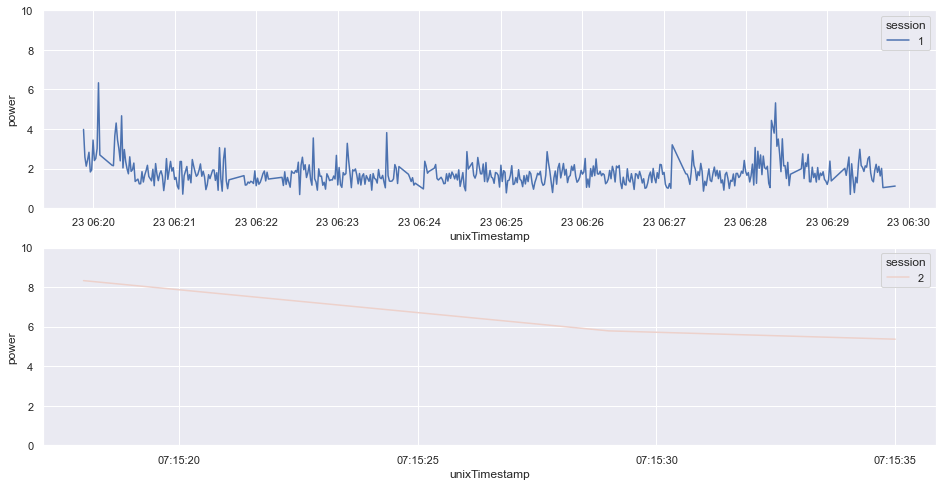

In [28]:
compare_sessions(session_a_df, session_b_df, 'F6', 'theta')

In [46]:
# join all the sessions for a day into one json
# input - day, find all recordings for the day & merge them into 1

get_powerSpectrumSignalQuality('1674454790', download=True)

Written data to /Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerSpectrum_signalQuality_1674454790.json


,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta,CP3_stdvalue,C3_stdvalue,F5_stdvalue,PO3_stdvalue,PO4_stdvalue,F6_stdvalue,C4_stdvalue,CP4_stdvalue
0,2023-01-23 06:19:51+00:00,350.069233,151.800899,1128.070625,20.343473,834.024609,531.761834,229.590165,1715.023012,30.461286,1266.724918,221.865789,96.338612,715.094961,12.757383,528.635836,253.675054,109.672117,820.198117,14.519095,606.162411,405.534669,175.195049,1309.458138,23.221439,968.337087,130.877142,57.068260,420.674410,7.571945,312.139689,427.837032,186.710304,1379.771321,24.884832,1025.465109,97.674060,42.297430,314.445128,5.664346,232.109452,9.5725,9.515000,10.0875,7.130000,7.310000,14.885000,28.3100,6.535000
1,2023-01-23 06:19:52+00:00,4.095093,1.611044,30.349270,0.455363,12.027859,5.912251,1.809990,45.124244,0.477724,17.885419,3.989631,1.391000,19.911477,0.371543,8.691340,3.724543,1.172106,21.713038,0.393303,8.906501,4.583904,1.616774,34.002061,0.523304,13.452219,4.650716,1.310395,14.123272,0.316650,8.298428,8.050535,2.234619,38.234622,0.667654,18.506480,2.024887,0.916648,9.470681,0.248291,4.049495,10.0725,9.227500,8.4325,6.477500,5.722500,15.010000,14.4550,7.447500
2,2023-01-23 06:19:53+00:00,3.464654,1.767511,7.060940,0.312210,6.083582,2.164451,1.306134,3.649629,0.266191,2.378155,1.563666,1.019689,1.912815,0.196139,1.841123,1.942486,1.034856,2.301468,0.169436,1.911673,2.050943,1.043536,2.486854,0.152545,2.487042,2.194498,1.458522,5.161242,0.216723,3.976220,2.874115,1.768630,5.154229,0.280175,4.748704,1.677528,1.078343,3.560273,0.189025,2.858119,13.8050,9.022500,6.5075,5.995000,6.322500,10.757500,10.5300,7.272500
3,2023-01-23 06:19:54+00:00,2.937172,1.765956,6.351007,0.302789,6.608887,2.418466,0.904032,2.298290,0.143969,2.130271,2.150430,1.019552,2.485052,0.165421,2.348604,1.694408,0.848882,2.804785,0.158156,2.089086,1.850335,1.075281,1.808471,0.114732,1.572247,2.877198,1.101761,4.138451,0.217334,2.579466,2.588826,1.297085,4.212150,0.213999,3.441087,1.332415,0.812929,2.290244,0.130950,1.750675,14.5150,7.382500,6.7525,6.942500,6.510000,9.070000,10.9300,5.565000
4,2023-01-23 06:19:55+00:00,3.782501,2.698244,8.796332,0.461086,6.680092,1.531091,0.848923,2.033402,0.126856,1.481435,1.648444,1.107393,2.348616,0.147781,2.604561,2.155739,0.857802,3.400332,0.120462,2.432792,2.176522,0.861569,1.878797,0.117591,1.978518,2.703285,1.078138,1.852913,0.145181,2.118480,2.345592,1.171430,3.693150,0.216262,2.615605,1.837524,0.945472,2.344820,0.138302,1.886975,16.7775,5.492500,6.5275,7.027500,6.120000,7.297500,8.7150,6.155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2023-01-23 06:29:38+00:00,54.453871,19.661927,145.430645,2.949527,106.775108,1.164323,0.624169,0.904166,0.134360,0.824372,1.742470,0.812507,2.391771,0.182038,2.040567,2.207829,0.668112,1.822229,0.161694,1.521615,2.304844,0.704737,1.499018,0.142802,1.734098,1.740418,0.816765,2.051328,0.190949,2.108320,2.573248,1.946569,4.115477,0.292104,3.922276,1.489094,0.526284,1.716589,0.139875,1.538819,310.2400,4.103333,5.4500,5.223333,5.193333,6.243333,13.1100,4.413333
522,2023-01-23 06:29:39+00:00,3.163209,1.401513,19.954815,0.412992,8.497137,1.294849,0.713341,1.268238,0.136539,1.271062,1.265181,0.761119,2.238922,0.164824,1.988603,2.687344,0.809496,1.814596,0.187099,1.752993,3.726515,1.096966,2.047960,0.198332,2.071284,1.498632,0.864788,1.689977,0.193924,1.623336,2.257116,0.844336,1.575196,0.175909,2.287140,2.457959,0.720405,1.984461,0.157591,2.218502,52.8025,4.185000,5.4875,7.525000,8.015000,5.812500,5.8100,5.990000
523,2023-01-23 06:29:40+0

In [ ]:

# TODO: brain power & health vis

# TODO: brain power & productivity vis

# TODO: now do average across a set of channels - move this to frontend

In [ ]:
# need to run data through Alex's app to see what I can learn from there

# also read about how to do time series analysis when values change .. 
# would it be better to just look at overall flow in between? like how do I summarize it?

In [ ]:
- [x] read through papers and see approaches
# you can compute relative power from absolute power dataset 

In [40]:
# get timestamps from file path

import glob
import json


def getTimestampFromPath(path):
    """
    Split the path by the underscore and get the last value - which is the timestamp
    """
    return path.split("_")[-1].split(".")[0]

def get_file_list(file_pattern: str):
    """
    example file_pattern: "/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/deji/powerByBand_*.json"
    """
    # Get a list of all the files with a path matching the pattern
    files = glob.glob(file_pattern)

    # Iterate through each file and extract the timestamp value
    fileTimestamps = []
    for file in files:
        fileTimestamps.append((getTimestampFromPath(file)))

    return sorted(fileTimestamps)


get_file_list()

['1665632132', '1665632460', '1665632927', '1665633719']